# 第六次课后习题

学号：20179065 $ \qquad $ 班级序列号：170230 $ \qquad $ 姓名：董秩序

## 0. 名词解释
* perturbations 扰动
* elongated 拉长；(使)延长
* latent variable 潜变量；隐藏变量
>潜变量，与可观察变量相对，是不直接观察但是通过观察到的其他变量推断（通过数学模型）的变量（直接测量）。旨在用潜在变量解释观察变量的数学模型称为潜变量模型。

## 1. 关于条件数的问题

>条件数(condition number) 是矩阵运算误差分析的基本工具，它可以度量矩阵对于数值计算的敏感性和稳定性，也可以用来检定病态系统

>病态系统:当一线性系统受到极微小的扰动即可引发方程解剧烈变化时，我们将无从信任计算结果，便称它是病态系统

>条件数是线性方程组$Ax=b$的解对b中的误差或不确定度的敏感性的度量。
 矩阵A的条件数等于**A的范数与A的逆的范数的乘积**，
即$cond(A)=‖A‖·‖A$<sup>-1</sup>$‖$，

对应矩阵的3种范数，相应地可以定义3种条件数。

### What is the condition number of an orthonormal matrix?

orthonormal matrix:正交矩阵；
正交矩阵的条件数等于1

### What is the condition number of a singular matrix?

singular matrix:奇异矩阵；奇异矩阵的条件数为无穷大

## 2. 椭圆的程序实例
修改前面绘制协方差椭圆的例子，观察有小的扰动，引起条件数变得巨大时候，椭圆被压扁的程序实例


In [1]:
import numpy as np
from matplotlib.patches import Ellipse 
import matplotlib.pyplot as plt

In [2]:
def plotCircle(mu,sigma):
    # 求矩阵X的2-范数的条件数
    cont = np.linalg.norm(sigma)*np.linalg.norm(np.linalg.inv(sigma))
    print("矩阵的2-范数的条件数为：",cont)
    # Compute eigenvalues and associated eigenvectors from the covariance matrix
    #求解协方差矩阵的特征值及其对应的特征向量
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using the eigenvector corresponding the maximum eigenvalue
    #求解最大特征值对应的特征向量与 x 轴的夹角
    x, y = vecs[:, 1]
    theta = np.degrees(np.arctan2(y, x))

    # Compute the semi‐minor and semi‐major axis length of a 95% confidence ellipse along each eigenvector
    #根据特征值求解 95% 误差椭圆的半长轴和半短轴
    h, w = np.sqrt(5.991 * vals) #求解 95% 误差椭圆并作图
    ell = Ellipse(mu, 2*w, 2*h, theta) 
    ell.set_alpha(0.5) 
    ell.set_fill(False)

    ax = plt.subplot(111,aspect='equal')
    ax.add_artist(ell) 
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()


矩阵的2-范数的条件数为： 5.769230769230771


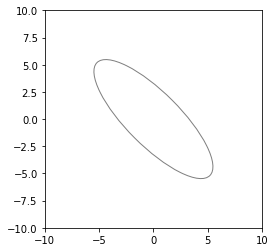

In [3]:
mu = [0,0] #均值
sigma = [[5,-3],[-4,5]] #协方差矩阵

plotCircle(mu,sigma)

矩阵的2-范数的条件数为： 8.059223300970874


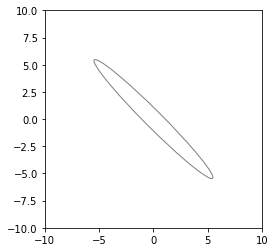

In [4]:
mu = [0,0] #均值
sigma = [[5,-3],[-4.9,5]] #协方差矩阵

plotCircle(mu,sigma)

## 3. 计算标准差

In [5]:
import math

In [6]:
def std_deviation(records):
    #平均值
    av = sum(records) / len(records)
    
    #每个样本数据 减去样本全部数据的平均值
    #所得的各个数值的平方相加
    total = 0
    for i in records:
        total += (i-av)**2
     
    #结果除以 (n - 1)（“n”指样本数目）
    #数值之平方根就是抽样的标准偏差
    std = math.sqrt(total/(len(records)-1))
    return std

In [7]:
records1 = [3, 4, 5]
std_deviation(records1)

1.0

## 4.实验和代码
### 编写PCA并验证


PCA把原先的n个特征用数目更少的k个特征取代，新特征是旧特征的线性组合，
这些线性组合最大化样本方差，尽量使新的k个特征互不相关。

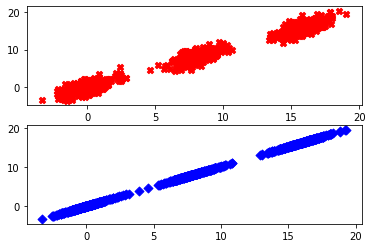

In [8]:
def loadDataSet(fileName):
    dataSetList = []
    fr = open(fileName)
    for row in fr.readlines():
        cur_line = row.strip().split('\t')
        proce_line = list(map(float,cur_line))
        dataSetList.append(proce_line)
    dataSetList = np.array(dataSetList)
    return dataSetList

def pca(dataMat, topNfeat = 999999):
    # 竖着求平均值，数据格式是m×n
    meanValues = np.mean(dataMat,axis=0)
    # 0均值化  m×n维
    meanRemoved = dataMat - meanValues  
    # 每一列作为一个独立变量求协方差  n×n维
    covMat = np.cov(meanRemoved,rowvar=0)
    # 求特征值和特征向量  eigVects是n×n维
    eigVals, eigVects = np.linalg.eig(np.mat(covMat)) 
    # 特征值由大到小排序，eigValInd十个arrary数组 1×n维
    eigValInd = np.argsort(-eigVals)
    
    # 选取前topNfeat个特征值的序号  1×r维
    eigValInd = eigValInd[:topNfeat]
    # 把符合条件的几列特征筛选出来组成P  n×r维
    redEigVects = eigVects[:,eigValInd]
    # 矩阵点乘筛选的特征向量矩阵  m×r维 公式Y=X*P
    lowDDataMat = meanRemoved * redEigVects
    # 转换新空间的数据  m×n维
    reconMat = (lowDDataMat * redEigVects.T) + meanValues 
    return lowDDataMat, reconMat

def drawPoints(dataset1,dataset2):
    # 画图，dataset1是没降维的数据，dataset2是数据映射到新空间的数据
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.scatter(dataset1[:,0],dataset1[:,1],marker='X',s=40,color='red')
    dataset2 = np.array(dataset2)
    ax2.scatter(dataset2[:,0],dataset2[:,1],marker='D',s=40,color='blue')
    plt.show()

if __name__ == '__main__':
    data = loadDataSet('E:\Documents\DAY\pca_data.txt')
    proccess_data, reconMat = pca(data,1)
    drawPoints(data,reconMat)

### 调用sklearn中的PCA


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=2)     #加载PCA算法，设置降维后主成分数目为2
reduced_x=pca.fit_transform(data)#对样本进行降维
print(pca.explained_variance_ratio_)
#第一个特征的单个变量方差贡献率已经到达0.99,意味着几乎保留了所有的信息。所以只保留一个特征即可

[0.9943742  0.00546756]
